# **Предсказание дефолта по кредиту**

**Выполнил: Иванов Андрей 3822М1ФИии1**

# Описание

Доходы банков в основном формируются за счёт выдачи кредитов. Но часто это связано с риском. Чтобы выданный кредит вернулся с процентом, банк должен удостовериться в  финансовой и социальной благонадежности заемщика.
Для решения данной проблемы предлагается разработать надежную модель ML для  предсказания, объявит ли заемщик дефолт по кредиту или нет.

# 1. Загрузка данных


In [2]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [3]:
url = 'https://raw.githubusercontent.com/andrewiva99/MachineLearningHW/main/Loan.csv'
df = pd.read_csv(url)

Таблица содержит данные о более 148 тыс. заемщиков. Для каждого заемщика указаны 30 разнородных признаков.  Количество классов два (допустил ли заемщик дефолт по кредиту или нет).

In [4]:
df.shape

(148647, 30)

In [5]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,24913,2019,cf,Female,nopre,p3,l1,nopc,nob/c,316500,...,2760.0,CIB,620,CIB,65-74,62.303150,south,direct,0,44.0
1,24914,2019,cf,Male,nopre,p3,l2,nopc,nob/c,336500,...,4980.0,CIB,846,CIB,35-44,78.621495,south,direct,0,35.0
2,24915,2019,NaN,Joint,nopre,p3,l1,nopc,nob/c,426500,...,8940.0,EXP,533,EXP,45-54,75.088028,North,direct,0,34.0
3,24916,2019,cf,Joint,nopre,p1,l1,nopc,nob/c,476500,...,6780.0,EQUI,518,EXP,45-54,NaN,south,direct,1,NaN
4,24917,2019,cf,Sex Not Available,nopre,p4,l1,nopc,nob/c,196500,...,3840.0,EXP,812,EXP,25-34,76.162791,south,direct,0,49.0


In [6]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1'],
      dtype='object')

* Цель: построить модель, предсказывающую объявит ли заемщик дефолт по кредиту или нет
* Объём данных = 148647, кол. признаков = 30, классов = 2
* 17 категориальных признаков, 12 количественных признаков, целевой признак бинарный
* Пропущенных значений от 1% до 26%
* Классы не сбалансированы: 75% и 25%  

Описание признаков:
*   `ID` - идентификатор клиента
*   `year` - год выдачи кредита
*   `loan limit` - максимально допустимая сумма кредита, которую можно взять
*   `Gender` - пол
*   `approv_in_adv` - одобрен ли кредит заранее или нет
*   `loan_purpose` - причина, по которой хотят взять кредит
*   `Credit_Worthiness` - это то, как кредитор определяет, что клиент не выполнит свои долговые обязательства, или насколько клиент достоен получить новый кредит
*   `open_credit` -  предварительно утвержденный кредит между кредитором и заемщиком. Это позволяет заемщику делать повторные снятия до определенного предела
*   `business_or_commercial` - тип использования кредита
*   `loan_amount` - точная сумма кредита
*   `rate_of_interest` - это сумма, которую кредитор взимает с заемщика, и процент от основной суммы долга
*   `Interest_rate_spread` - разница между процентной ставкой, которую финансовое учреждение выплачивает вкладчикам, и процентной ставкой, которую оно получает по кредитам
*   `Upfront_charges` - комиссия, выплачиваемая кредитору заемщиком в качестве вознаграждения за предоставление нового кредита
*  `term` - срок погашения кредита
*  `Neg_ammortization` - относится к ситуации, когда заемщик по кредиту вносит платеж меньше стандартного взноса, установленного банком.
*  `interest_only` - только сумма процентов без учета принципов
*  `lump_sum_payment` - это сумма денег, которая выплачивается единовременным платежом, а не частями
*  `property_value` - текущая стоимость будущих выгод, возникающих в результате владения имуществом
*  `Secured_by` - тип обеспечения
*  `total_units` - количество соглашений
*  `income` - доход
*  `credit_type` - тип кредита
*  `Credit_Score` - кредитный рейтинг
*  `co-applicant_credit_type` -  дополнительное лицом, участвующее в процессе подачи заявки на получение кредита. Как заявитель, так и соавтор заявления подают заявку и расписываются в получении кредита
*  `age` - возраст клиента
*  `LTV` - прогнозирование чистой прибыли
*  `Region` - регион клиента
*  `Security_Type` - тип обеспечения
*  `Status` - дефолт допущен или нет
*  `dtir1`  - отношение долга к доходу


Признаки `loan_limit`, `Gender`, `approv_in_adv`, `loan_purpose`, `Credit_Worthiness`, `open_credit`, `business_or_commercial`, `Neg_ammortization`, `interest_only`, `lump_sum_payment`, `Secured_by`, `total_units`, `credit_type`, `co-applicant_credit_type`, `age`, `Region`, `Security_Type` - категориальные, целевой признак `Status` - бинарный, а остальные признаки - количественные (числовые).

# 2. Визуализация данных и вычисление основных характеристик 


In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148647.000000,148647.0,1.486470e+05,112216.000000,112016.000000,109014.000000,148606.000000,1.335500e+05,139498.000000,148647.000000,133550.000000,148647.000000,124528.000000
mean,99236.000000,2019.0,3.311164e+05,4.045473,0.441668,3225.076063,335.134349,4.978997e+05,6957.394371,699.788472,72.745778,0.246429,37.732783
std,42910.837069,0.0,1.839112e+05,0.561396,0.513061,3251.160228,58.411398,3.599520e+05,6496.912517,115.875030,39.970565,0.430933,10.545544
min,24913.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62074.500000,2019.0,1.965000e+05,3.625000,0.076000,581.430000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99236.000000,2019.0,2.965000e+05,3.990000,0.390400,2596.660000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136397.500000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


Из таблицы видно, что разброс для признака `year` равен 0, следовательно признак принимает единственное значение, при обучение модели этот признак будет бесполезен.

Диаграмма рассеивания:

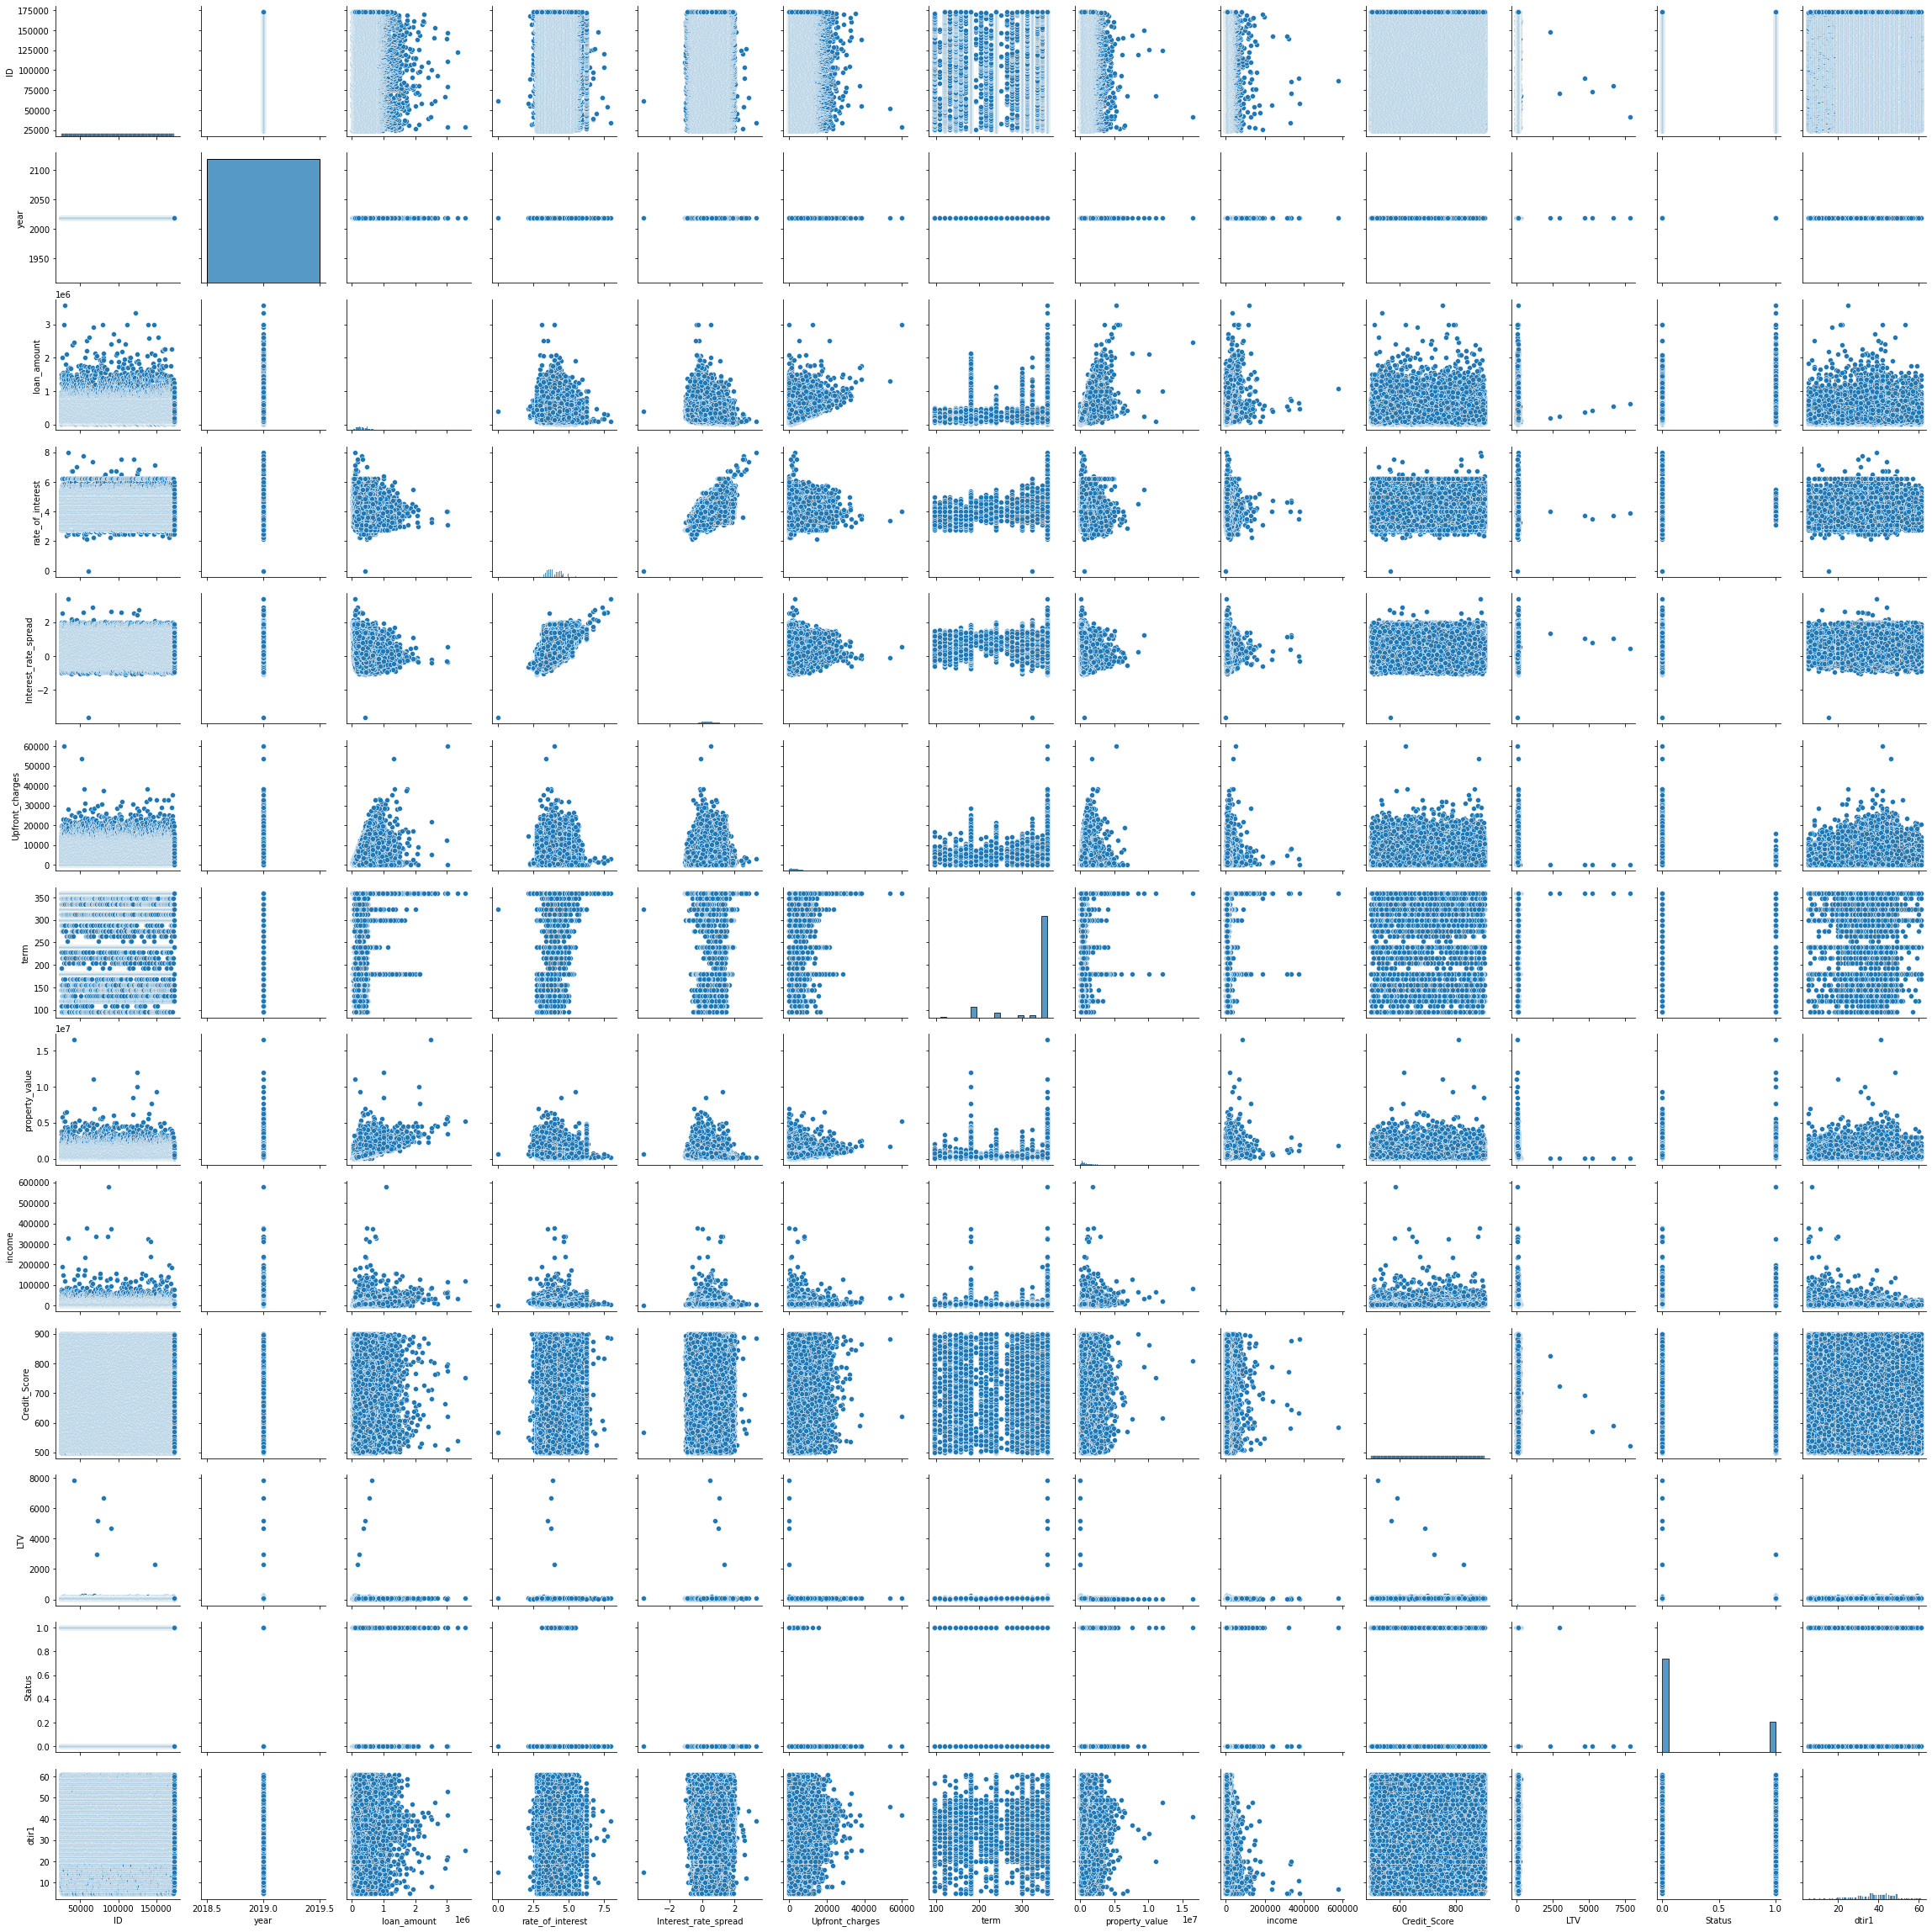

In [ ]:
cols = ['ID',	'year',  'loan_amount',	'rate_of_interest',	'Interest_rate_spread',	'Upfront_charges',	'term',	'property_value',	'income', 'Credit_Score',	'LTV',	'Status',	'dtir1']
sns.pairplot(df[cols])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148647 entries, 0 to 148646
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148647 non-null  int64  
 1   year                      148647 non-null  int64  
 2   loan_limit                145304 non-null  object 
 3   Gender                    148647 non-null  object 
 4   approv_in_adv             147739 non-null  object 
 5   loan_purpose              148513 non-null  object 
 6   Credit_Worthiness         148647 non-null  object 
 7   open_credit               148647 non-null  object 
 8   business_or_commercial    148647 non-null  object 
 9   loan_amount               148647 non-null  int64  
 10  rate_of_interest          112216 non-null  float64
 11  Interest_rate_spread      112016 non-null  float64
 12  Upfront_charges           109014 non-null  float64
 13  term                      148606 non-null  f

Вычислим матрицу корреляции для количественных признаков:

In [ ]:
corr_mat = df.corr()
corr_mat

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.000000,NaN,-0.000553,0.000451,0.002297,-0.005551,-0.003991,0.000961,0.002521,-0.001027,-0.005825,0.001767,-0.008110
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000553,NaN,1.000000,-0.150846,-0.377269,0.065638,0.174479,0.734234,0.456051,0.004451,0.038872,-0.036735,0.015030
rate_of_interest,0.000451,NaN,-0.150846,1.000000,0.614916,-0.076446,0.209298,-0.122605,-0.041768,-0.001335,-0.000229,0.022959,0.055024
Interest_rate_spread,0.002297,NaN,-0.377269,0.614916,1.000000,0.033021,-0.157149,-0.334562,-0.151316,-0.001725,0.040255,NaN,0.078149
Upfront_charges,-0.005551,NaN,0.065638,-0.076446,0.033021,1.000000,-0.054892,0.053084,0.016573,-0.001519,-0.031335,-0.019140,0.000187
term,-0.003991,NaN,0.174479,0.209298,-0.157149,-0.054892,1.000000,0.045125,-0.053756,-0.003156,0.106824,-0.000255,0.110510
property_value,0.000961,NaN,0.734234,-0.122605,-0.334562,0.053084,0.045125,1.000000,0.414862,0.002448,-0.215101,-0.048778,-0.056277
income,0.002521,NaN,0.456051,-0.041768,-0.151316,0.016573,-0.053756,0.414862,1.000000,0.000820,-0.066185,-0.065062,-0.267787
Credit_Score,-0.001027,NaN,0.004451,-0.001335,-0.001725,-0.001519,-0.003156,0.002448,0.000820,1.000000,-0.005540,0.003997,-0.000347


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

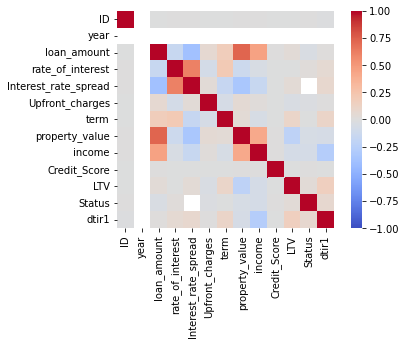

In [ ]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Видно: 
* признаки `interest_rate_spread` и `rate_of_interest` сильно коррелируют
* между `ID` и другими признаками практически нет зависимости, следовательно при обучения модели этот признак будет бесполезен
* признак `Credit_Score` очень слабо коррелирует с другими признаками 

# 3. Обработка пропущенных значений

Проверим наличие пропущенных значений 

In [7]:
df.isna().sum()

ID                              0
year                            0
loan_limit                   3343
Gender                          0
approv_in_adv                 908
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest            36431
Interest_rate_spread        36631
Upfront_charges             39633
term                           41
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value              15097
Secured_by                      0
total_units                     0
income                       9149
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
LTV                         15097
Region                          0
Security_Type                   0
Status                          0
dtir1         

Для удобства узнаем процент пропущенных значений для каждого признака

In [8]:
def att_null_persent(df):
  row = df.shape[0]
  miss_col = [col for col in df.columns if  df[col].isnull().sum()  >0]
  for col in miss_col:
    null_count = df[col].isnull().sum()
    per_null_count = (null_count * 100)/row
    print(f"{col} : {null_count} ({per_null_count.round(3)}%)")


In [9]:
att_null_persent(df)

loan_limit : 3343 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36431 (24.508%)
Interest_rate_spread : 36631 (24.643%)
Upfront_charges : 39633 (26.662%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15097 (10.156%)
income : 9149 (6.155%)
age : 200 (0.135%)
LTV : 15097 (10.156%)
dtir1 : 24119 (16.226%)


Заметим, что признак `Upfront_charges` имеет наибольший процент промущенных значений - 26.662%

Признак `term` имеет наименьший процент пропущенных значений - 0.028%

Узнаем сколько пропусков возможно в строке

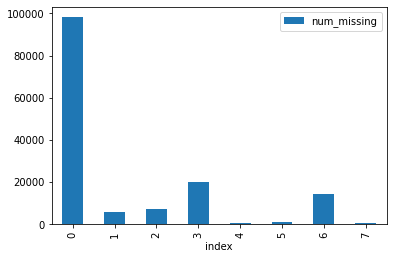

In [10]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Максимально число пропущенных признаков в строке равно 8. 

Отбросим строчки, в которых пропусков больше чем 5.

In [11]:
ind_missing = df[df['num_missing'] > 4].index
df = df.drop(ind_missing, axis=0)
lst_todrop = [col for col in df.columns if 'missing' in col]
df = df.drop(lst_todrop, axis = 1) #удаление ранее добавленных признаков, при формировании гистограммы


In [12]:
df.shape[0]

132482

In [13]:
att_null_persent(df)

loan_limit : 2955 (2.23%)
approv_in_adv : 809 (0.611%)
loan_purpose : 109 (0.082%)
rate_of_interest : 20322 (15.339%)
Interest_rate_spread : 20466 (15.448%)
Upfront_charges : 23477 (17.721%)
term : 29 (0.022%)
Neg_ammortization : 113 (0.085%)
property_value : 2 (0.002%)
income : 8064 (6.087%)
age : 144 (0.109%)
LTV : 2 (0.002%)
dtir1 : 7954 (6.004%)


Заполним пропущенные значения.

Для численных признаков можно воспользоваться методом принудительного заполнения пропусков. Например, на место пропуска можно записать среднее или медианное значение, полученное из остальных записей.

Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение.

In [14]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        med = df[col].median()
        df[col] = df[col].fillna(med)

In [15]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        top = df[col].describe()['top'] 
        df[col] = df[col].fillna(top)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132482 entries, 0 to 148646
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        132482 non-null  int64  
 1   year                      132482 non-null  int64  
 2   loan_limit                132482 non-null  object 
 3   Gender                    132482 non-null  object 
 4   approv_in_adv             132482 non-null  object 
 5   loan_purpose              132482 non-null  object 
 6   Credit_Worthiness         132482 non-null  object 
 7   open_credit               132482 non-null  object 
 8   business_or_commercial    132482 non-null  object 
 9   loan_amount               132482 non-null  int64  
 10  rate_of_interest          132482 non-null  float64
 11  Interest_rate_spread      132482 non-null  float64
 12  Upfront_charges           132482 non-null  float64
 13  term                      132482 non-null  f

# 4. Обработка категориальных признаков

Сначала рассмотрим бинарные признаки

In [17]:
col_for_bin = []
for col in df_non_numeric.columns:
  uniqs = df[col].unique()
  if(len(uniqs) == 2):
    col_for_bin.append(col)
    print(f"{col} : {uniqs}")

loan_limit : ['cf' 'ncf']
approv_in_adv : ['nopre' 'pre']
Credit_Worthiness : ['l1' 'l2']
open_credit : ['nopc' 'opc']
business_or_commercial : ['nob/c' 'b/c']
Neg_ammortization : ['not_neg' 'neg_amm']
interest_only : ['not_int' 'int_only']
lump_sum_payment : ['not_lpsm' 'lpsm']
Secured_by : ['home' 'land']
co-applicant_credit_type : ['CIB' 'EXP']
Security_Type : ['direct' 'Indriect']


Бинарный признак заменяем на числовой:

In [18]:
for col in col_for_bin:
  df[col] = pd.factorize(df[col])[0]

Рассмотрим категориальные(небинарные) признаки

In [19]:
col_for_bin = []
for col in df_non_numeric.columns:
  uniqs = df[col].unique()
  if(len(uniqs) > 2):
    col_for_bin.append(col)
    print(f"{col} : {uniqs}")

Gender : ['Female' 'Male' 'Joint' 'Sex Not Available']
loan_purpose : ['p3' 'p4' 'p1' 'p2']
total_units : ['1U' '2U' '3U' '4U']
credit_type : ['CIB' 'EXP' 'CRIF' 'EQUI']
age : ['65-74' '35-44' '45-54' '25-34' '55-64' '<25' '>74']
Region : ['south' 'North' 'central' 'North-East']


Применим метод бинаризации (one-hot encoding)

In [20]:
for col in col_for_bin:
   new_att = pd.get_dummies(df[col])
   df = pd.concat((df, new_att), axis=1)
   df = df.drop(col, axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132482 entries, 0 to 148646
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        132482 non-null  int64  
 1   year                      132482 non-null  int64  
 2   loan_limit                132482 non-null  int64  
 3   approv_in_adv             132482 non-null  int64  
 4   Credit_Worthiness         132482 non-null  int64  
 5   open_credit               132482 non-null  int64  
 6   business_or_commercial    132482 non-null  int64  
 7   loan_amount               132482 non-null  int64  
 8   rate_of_interest          132482 non-null  float64
 9   Interest_rate_spread      132482 non-null  float64
 10  Upfront_charges           132482 non-null  float64
 11  term                      132482 non-null  float64
 12  Neg_ammortization         132482 non-null  int64  
 13  interest_only             132482 non-null  i

# 5. Нормализация количественных признаков

In [22]:
df.describe()

,ID,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,35-44,45-54,55-64,65-74,<25,>74,North,North-East,central,south
count,132482.000000,132482.0,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,1.324820e+05,132482.000000,132482.000000,...,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000
mean,99215.085483,2019.0,0.065518,0.158037,0.040836,0.003850,0.135098,3.313589e+05,4.036963,0.433748,...,0.221849,0.236236,0.219607,0.137724,0.008869,0.046587,0.506574,0.008145,0.058491,0.426790
std,42888.867040,0.0,0.247439,0.364777,0.197910,0.061926,0.341829,1.819040e+05,0.517019,0.472133,...,0.415492,0.424770,0.413982,0.344612,0.093758,0.210754,0.499959,0.089879,0.234670,0.494613
min,24913.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.650000e+04,0.000000,-3.638000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62086.250000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.965000e+05,3.750000,0.135800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99148.500000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.965000e+05,3.990000,0.390400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,136321.750000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.365000e+05,4.375000,0.683700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,173559.000000,2019.0,1.000000,1.000000,1.000000,1.000000,1.000000,3.576500e+06,8.000000,3.357000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Проведем нормализацию количественных признаков

In [23]:
df = (df - df.min(axis = 0))/(df.max(axis = 0) - df.min(axis = 0))

In [24]:
df.describe()

,ID,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,35-44,45-54,55-64,65-74,<25,>74,North,North-East,central,south
count,132482.000000,0.0,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,...,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000,132482.000000
mean,0.499859,NaN,0.065518,0.158037,0.040836,0.003850,0.135098,0.088444,0.504620,0.582094,...,0.221849,0.236236,0.219607,0.137724,0.008869,0.046587,0.506574,0.008145,0.058491,0.426790
std,0.288530,NaN,0.247439,0.364777,0.197910,0.061926,0.341829,0.051097,0.064627,0.067496,...,0.415492,0.424770,0.413982,0.344612,0.093758,0.210754,0.499959,0.089879,0.234670,0.494613
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250079,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.050562,0.468750,0.539500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.499411,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.078652,0.498750,0.575897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.749490,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.117978,0.546875,0.617827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Отбор признаков

Будем использовать все признаки кроме: `ID` и `year`.

Признак `ID` не информативен, и по сути бесполезен при обучении модели, т.к. этот признак интерпретируется, как уникальный номер клиента и очень слабо коррелирует с другими признаками.

In [25]:
df.shape

(132482, 51)

In [26]:
df['ID'].unique

<bound method Series.unique of 0         0.000000
1         0.000007
2         0.000013
4         0.000027
5         0.000034
            ...   
148642    0.999973
148643    0.999980
148644    0.999987
148645    0.999993
148646    1.000000
Name: ID, Length: 132482, dtype: float64>

In [27]:
df = df.drop('ID', axis=1)

Удалим признак `year`, так как он принимает единственное значение.

In [28]:
df['year'].unique

<bound method Series.unique of 0        NaN
1        NaN
2        NaN
4        NaN
5        NaN
          ..
148642   NaN
148643   NaN
148644   NaN
148645   NaN
148646   NaN
Name: year, Length: 132482, dtype: float64>

In [29]:
df = df.drop('year', axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132482 entries, 0 to 148646
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_limit                132482 non-null  float64
 1   approv_in_adv             132482 non-null  float64
 2   Credit_Worthiness         132482 non-null  float64
 3   open_credit               132482 non-null  float64
 4   business_or_commercial    132482 non-null  float64
 5   loan_amount               132482 non-null  float64
 6   rate_of_interest          132482 non-null  float64
 7   Interest_rate_spread      132482 non-null  float64
 8   Upfront_charges           132482 non-null  float64
 9   term                      132482 non-null  float64
 10  Neg_ammortization         132482 non-null  float64
 11  interest_only             132482 non-null  float64
 12  lump_sum_payment          132482 non-null  float64
 13  property_value            132482 non-null  f

Сформируем выборку

In [31]:
Y = df['Status']
X = df.drop('Status', axis=1)

In [32]:
type(X), type(Y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

#7. Обучение модели

## 7.1 Разобьем выборку на обучающую и тестовую 

Разобьем данные на обучающую и тестовую выборку в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая выборка)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [36]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(99361, 33121)

## 7.2 Классификатор k-ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_table = pd.DataFrame(columns=('train', 'test'))

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['3 Nearest Neighbours', :] = (error_train, error_test)
error_table

,train,test
3 Nearest Neighbours,0.105796,0.177531


In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['5 Nearest Neighbours', :] = (error_train, error_test)
error_table

,train,test
3 Nearest Neighbours,0.105796,0.177531
5 Nearest Neighbours,0.127978,0.162948


In [ ]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['10 Nearest Neighbours', :] = (error_train, error_test)
error_table

,train,test
3 Nearest Neighbours,0.105796,0.177531
5 Nearest Neighbours,0.127978,0.162948
10 Nearest Neighbours,0.146929,0.153045


In [ ]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['15 Nearest Neighbours', :] = (error_train, error_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['20 Nearest Neighbours', :] = (error_train, error_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['25 Nearest Neighbours', :] = (error_train, error_test)

В итоге получаем таблицу ошибок на обучающей и тестовой выборке для разных параметров в методе k-ближайших соседей

In [ ]:
error_table

,train,test
3 Nearest Neighbours,0.105796,0.177531
5 Nearest Neighbours,0.127978,0.162948
10 Nearest Neighbours,0.146929,0.153045
15 Nearest Neighbours,0.14869,0.153135
20 Nearest Neighbours,0.151428,0.153377
25 Nearest Neighbours,0.15178,0.153437


Наиболее оптимальная модель получена по методу 25-ближайших соседей.
Ошибка на обучающей и тестовой выборке очень близки и примерно равны 15%.

## 7.3 Метод главных компонент (PCA)

Количество главных компонент равно 2

In [ ]:
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train) # или сразу pca.fit_transform(X)
X_test = pca.transform(X_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['PCA 5 Nearest Neighbours', :] = (error_train, error_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['PCA 10 Nearest Neighbours', :] = (error_train, error_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['PCA 15 Nearest Neighbours', :] = (error_train, error_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['PCA 20 Nearest Neighbours', :] = (error_train, error_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
error_train = np.mean(y_train != y_train_predict)
error_test = np.mean(y_test != y_test_predict)
error_table.loc['PCA 25 Nearest Neighbours', :] = (error_train, error_test)
error_table

,train,test
3 Nearest Neighbours,0.105796,0.177531
5 Nearest Neighbours,0.127978,0.162948
10 Nearest Neighbours,0.146929,0.153045
15 Nearest Neighbours,0.14869,0.153135
20 Nearest Neighbours,0.151428,0.153377
25 Nearest Neighbours,0.15178,0.153437
PCA 5 Nearest Neighbours,0.140327,0.172821
PCA 10 Nearest Neighbours,0.151609,0.156728
PCA 15 Nearest Neighbours,0.152464,0.155974
PCA 20 Nearest Neighbours,0.1533,0.154856


Метод главных компонент(n=2) позволил уменьшить разницу между ошибками на обучающей и тестовой выборке, а так же сократил время обучения модели.

# Выводы

* Построена модель, предсказывающая объявит ли заемщик дефолт по кредиту или нет
* Были удалены строчки в которых  присутствовало 6 или более пропусков
* Пропуски были заполнены медианой (для количественных признаков) или наиболее встречающимся значением(для категориальных признаков)
* Категориальные признаки были подвергнуты процессу бинаризации (кол. признаков увеличено до 51)
* Количественные признаки были подвергнуты процессу нормализации
* При обучении модели не участвовали признаки: `ID` и `year` 
* Данные разделены на обучающую(75%) и тестовую(25%) выборки 
* Лучшая модель построена по методу 25-ближайших соседей.

 Ошибка на тестовой выборке = 15.3% 
* Метод 3-ближайших соседей показал худший результат, модель переобучена.

 Ошибка на тестовой выборке 17.8% 

* Метод PCA (n=2) помог сократить разницу между ошибками на обучающей и тестовой выборке, а также значительно сократил время работы методов. Однако при этом незначительно увеличилась ошибка на тестовой выборке.

 

# 8. Полносвязная (неглубокая) нейронная сеть 

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Данные разбиты в пункте 7.1 на обучающую и тестовую выборку в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая выборка)

Размеры обучающей и тестовой выборки:

In [38]:
N_train, N_test

(99361, 33121)

Имеем достаточно большую выборку, поэтому в качестве solver выберем алгоритм adam. 

В качестве activation выберем функцию активации Relu.

Максимальное число итераций равно 500

Количество нейронов в скрытых слоях и гиперпараметр alpha будем подбирать.

### 8.1 Однослойная нейроная сеть

#### 8.1.1 Подбор числа нейронов в скрытом слое

In [ ]:
hidden_layer_sizes = np.arange(1, 16)
train_error, test_error = [], []
train_acc, test_acc = [], []

for i in hidden_layer_sizes:
  mlp_model =  MLPClassifier(hidden_layer_sizes = (i,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter = 500,
                          random_state = 42)
  mlp_model.fit(X_train, y_train)

  y_train_predict = mlp_model.predict(X_train)
  y_test_predict  = mlp_model.predict(X_test)
  error_train = np.mean(y_train != y_train_predict)
  error_test = np.mean(y_test != y_test_predict)
  acc_train = accuracy_score(y_train, y_train_predict)
  acc_test = accuracy_score(y_test, y_test_predict)

  train_error.append(error_train)
  test_error.append(error_test)

  train_acc.append(acc_train)
  test_acc.append(acc_test)

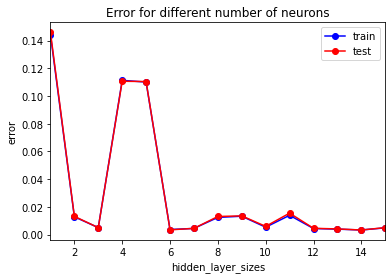

In [ ]:
plt.plot(hidden_layer_sizes, train_error, 'b-o', label="train")
plt.plot(hidden_layer_sizes, test_error, 'r-o', label="test")
plt.xlim([np.min(hidden_layer_sizes), np.max(hidden_layer_sizes)])
plt.title("Error for different number of neurons")
plt.xlabel('hidden_layer_sizes')
plt.ylabel('error')
plt.legend()

Заметим, что ошибки на обучающей и тестовой выборке практически совпадают.
Переобучение не наблюдается. Недообучение наблюдается при числе нейронов = 1, 4, 5

Надем количество нейронов в скрытом слое, при котором ошибка минимальна.

In [ ]:
min_error_test = np.min(test_error)
min_error_train = np.min(train_error)
print("Train: Min error =", min_error_train, ", number of neurons = ", np.argmin(train_error) + 1)
print("Test: Min error =", min_error_test, ", number of neurons = ", np.argmin(test_error) + 1)

Train: Min error = 0.00336147985628164 , number of neurons =  14
Test: Min error = 0.0033513480873162043 , number of neurons =  14


Построим график зависимости accuracy от числа нейронов.

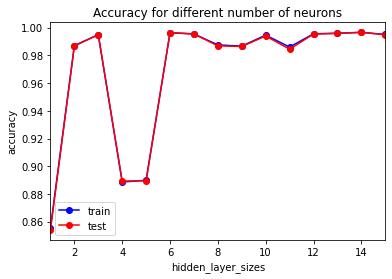

In [ ]:
plt.plot(hidden_layer_sizes, train_acc, 'b-o', label="train")
plt.plot(hidden_layer_sizes, test_acc, 'r-o', label="test")
plt.xlim([np.min(hidden_layer_sizes), np.max(hidden_layer_sizes)])
plt.title("Accuracy for different number of neurons")
plt.xlabel('hidden_layer_sizes')
plt.ylabel('accuracy')
plt.legend()

Найдем количество нейронов в скрытом слое, при котором accuracy максимальна.

In [ ]:
max_acc_test = np.max(test_acc)
max_acc_train = np.max(train_acc)
print("Train: Max accuracy =", max_acc_train, ", number of neurons = ", np.argmax(train_acc) + 1)
print("Test: Max accuracy =", max_acc_test, ", number of neurons = ", np.argmax(test_acc) + 1)

Train: Max accuracy = 0.9966385201437183 , number of neurons =  14
Test: Max accuracy = 0.9966486519126838 , number of neurons =  14


**Вывод**: оптимальное количество нейронов в скрытом слоe: 14 

При этом ошибка на тесте составляет всего 0.33%, а accuracy равна 99.6%. 

#### 8.1.2 Подбор параметра регуляризации alpha

Наилучший результат в предыдущем разделе показала нейронная сеть с числом нейронов в скрытом слое = 14.

Подберем параметр регуляризации alpha.

In [ ]:
alpha_arr = np.logspace(-4, 1, 30)
train_error, test_error = [], []
train_acc, test_acc = [], []

for i in alpha_arr:
  mlp_model =  MLPClassifier(
                          alpha = i,
                          hidden_layer_sizes = (14,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter = 500,
                          random_state = 42)
  mlp_model.fit(X_train, y_train)

  y_train_predict = mlp_model.predict(X_train)
  y_test_predict  = mlp_model.predict(X_test)
  error_train = np.mean(y_train != y_train_predict)
  error_test = np.mean(y_test != y_test_predict)
  acc_train = accuracy_score(y_train, y_train_predict)
  acc_test = accuracy_score(y_test, y_test_predict)

  train_error.append(error_train)
  test_error.append(error_test)

  train_acc.append(acc_train)
  test_acc.append(acc_test)

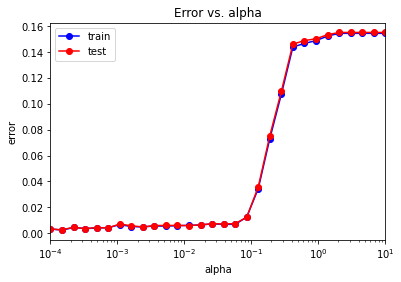

In [ ]:
plt.semilogx(alpha_arr, train_error, 'b-o', label="train")
plt.semilogx(alpha_arr, test_error, 'r-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title("Error vs. alpha")
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Переобучение не наблюдается. Недообучение наблюдается при alpha > $10^{-1}$.
Ошибка резко возрастает и стремится примерно к 16%.

Минимальное значение ошибки на обучающей и тестовой выборке:

In [ ]:
min_train_err = np.min(train_error)
min_test_err = np.min(test_error)
print(min_train_err, min_test_err)

0.002465756182002999 0.0026871169348751545


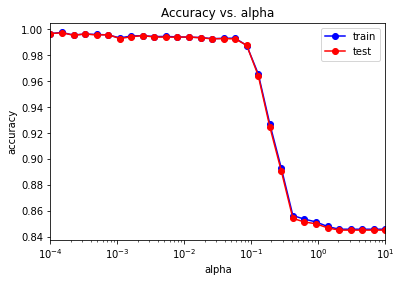

In [ ]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label="train")
plt.semilogx(alpha_arr, test_acc, 'r-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title("Accuracy vs. alpha")
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

Максимальное значение accuracy:

In [ ]:
max_train_acc = np.max(train_acc)
max_test_acc = np.max(test_acc)
print(max_train_acc, max_test_acc)

0.997534243817997 0.9973128830651249


Возьмем alpha, при котором минимальна ошибка на тесте:

In [ ]:
alpha_opt = alpha_arr[test_error == min_test_err]
alpha_opt = alpha_opt[0]
print("Alpha opt:", alpha_opt)

Alpha opt: 0.00014873521072935117


**Выводы** для однослойной нейронной сети: 

Оптимальное число нейронов в скрытом слое = 14

Оптимальный параметр регуляризации alpha = 0.000148

Ошибка на тесте = 0.27%, accuracy равна 99.7%

### 8.2 Двухслойная нейронная сеть

#### 8.2.1 Подбор числа нейронов в скрытых слоях

In [50]:
hidden_layer_sizes = np.linspace(1, 15, 5).astype(int)
test_error, train_error = np.zeros((5, 5)), np.zeros((5, 5))
train_acc, test_acc = np.zeros((5, 5)), np.zeros((5, 5))

index_mtrx = [[0 for i in range(5)] for _ in range(5)]

for i, num1 in enumerate(hidden_layer_sizes):
  for j, num2 in enumerate(hidden_layer_sizes):
      mlp_model =  MLPClassifier(hidden_layer_sizes = (num1,num2,),
                              solver = 'adam', 
                              activation = 'relu',
                              max_iter = 500,
                              random_state = 42)
      mlp_model.fit(X_train, y_train)

      y_train_predict = mlp_model.predict(X_train)
      y_test_predict  = mlp_model.predict(X_test)

      error_train = np.mean(y_train != y_train_predict)
      error_test = np.mean(y_test != y_test_predict)
      acc_train = accuracy_score(y_train, y_train_predict)
      acc_test = accuracy_score(y_test, y_test_predict)

      train_error[i][j] = error_train
      test_error[i][j] = error_test

      train_acc[i][j] = acc_train
      test_acc[i][j] = acc_test

      index_mtrx[i][j] = (num1, num2)


Посмотрим зависимость ошибки от числа нейронов в скрытых слоях:

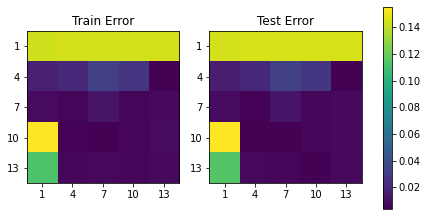

In [64]:
plt.subplot(121)
plt.title("Train Error")
plt.imshow(train_error)
plt.xticks(np.arange(5), np.arange(1, 15, 15 / 5).astype(int))
plt.yticks(np.arange(5), np.arange(1, 15, 15 / 5).astype(int))

plt.subplot(122)
plt.title("Test Error")
plt.imshow(test_error)
plt.xticks(np.arange(5), np.arange(1, 15, 15 / 5).astype(int))
plt.yticks(np.arange(5), np.arange(1, 15, 15 / 5).astype(int))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

Переобучение не наблюдается. Недообучения наблюдается, если число нейронов хотябы  в  одном из скрытых слоев равно 1. 

Найдем число нейронов в скрытых слоях при минимальной ошибки:

In [65]:
min_train_err = np.min(train_error)
ind_min_train_err = np.where(train_error == min_train_err)
index_train = index_mtrx[ind_min_train_err[0][0]][ind_min_train_err[1][0]]

min_test_err = np.min(test_error)
ind_min_test_err = np.where(test_error == min_test_err)
index_test = index_mtrx[ind_min_test_err[0][0]][ind_min_test_err[1][0]]

In [66]:
print("Минимальная ошибка на трейне =", min_train_err, ", число нейронов на скрытых слоях =", index_train)
print("Минимальная ошибка на тесте =", min_test_err, ", число нейронов на скрытых слоях =", index_test)

Минимальная ошибка на трейне = 0.0032105151920773746 , число нейронов на скрытых слоях = (11, 8)
Минимальная ошибка на тесте = 0.0038948099393134265 , число нейронов на скрытых слоях = (11, 8)


Построим зависимость accuracy от числа нейронов в скрытых слоях:

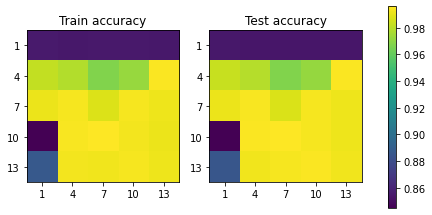

In [67]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(5), np.arange(1, 15, 15 / 5).astype(int))
plt.yticks(np.arange(5), np.arange(1, 15, 15 / 5).astype(int))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(5), np.arange(1, 15, 15 / 5).astype(int))
plt.yticks(np.arange(5), np.arange(1, 15, 15 / 5).astype(int))
cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

Найдем число нейронов при максимальной accuracy:

In [68]:
max_train_acc = np.max(train_acc)
ind_max_train_acc = np.where(train_acc == max_train_acc)
index_train = index_mtrx[ind_min_train_err[0][0]][ind_min_train_err[1][0]]

max_test_acc = np.max(test_acc)
ind_max_test_acc = np.where(test_acc == max_test_acc)
index_test = index_mtrx[ind_min_test_err[0][0]][ind_min_test_err[1][0]]

In [69]:
print("Максимальная accuracy на трейне =", max_train_acc, ", число нейронов на скрытых слоях =", index_train)
print("Максимальная accuracy на тесте =", max_test_acc, ", число нейронов на скрытых слоях =", index_test)

Максимальная accuracy на трейне = 0.9967894848079226 , число нейронов на скрытых слоях = (11, 8)
Максимальная accuracy на тесте = 0.9961051900606865 , число нейронов на скрытых слоях = (11, 8)


**Вывод**: оптимальное количество нейронов в скрытых слоях: (11, 8) 

При этом ошибка на тесте составляет всего 0.39%, а accuracy равен 99.6%.

#### 8.2.2 Подбор параметра регуляризации alpha

Наилучший результат в предыдущем разделе показала нейронная сеть с числом нейронов в скрытых слоях = (11, 8).

Подберем параметр регуляризации alpha.

In [79]:
alpha_arr = np.logspace(-6, 1, 30)
train_error, test_error = [], []
train_acc, test_acc = [], []

for i in alpha_arr:
  mlp_model =  MLPClassifier(
                          alpha = i,
                          hidden_layer_sizes = (11, 8,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter = 500,
                          random_state = 42)
  mlp_model.fit(X_train, y_train)

  y_train_predict = mlp_model.predict(X_train)
  y_test_predict  = mlp_model.predict(X_test)
  error_train = np.mean(y_train != y_train_predict)
  error_test = np.mean(y_test != y_test_predict)
  acc_train = accuracy_score(y_train, y_train_predict)
  acc_test = accuracy_score(y_test, y_test_predict)

  train_error.append(error_train)
  test_error.append(error_test)

  train_acc.append(acc_train)
  test_acc.append(acc_test)

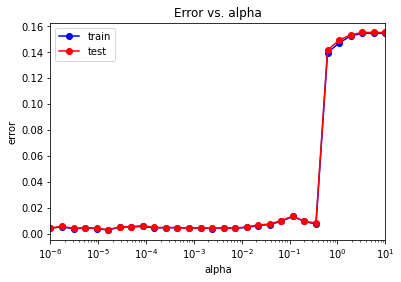

In [80]:
plt.semilogx(alpha_arr, train_error, 'b-o', label="train")
plt.semilogx(alpha_arr, test_error, 'r-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title("Error vs. alpha")
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Переобучение не наблюдается. Недообучение наблюдается при alpha > $10^{-1}$.
ошибка резко возрастает и стремится примерно к 16%.

Минимальное значение ошибки:

In [81]:
min_train_err = np.min(train_error)
min_test_err = np.min(test_error)
print(min_train_err, min_test_err)

0.0026368494681011665 0.0028984632106518523


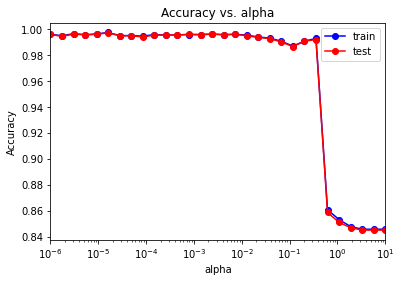

In [82]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label="train")
plt.semilogx(alpha_arr, test_acc, 'r-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title("Accuracy vs. alpha")
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Максимальное значение accuracy:

In [83]:
max_train_acc = np.max(train_acc)
max_test_acc = np.max(test_acc)
print(max_train_acc, max_test_acc)

0.9973631505318988 0.9971015367893481


Возьмем alpha, при котором минимальна ошибка на тесте:

In [84]:
alpha_opt = alpha_arr[test_error == min_test_err]
alpha_opt = alpha_opt[0]
print("Alpha opt:", alpha_opt)

Alpha opt: 1.610262027560939e-05


**Выводы** для двухслойной нейронной сети:

Оптимальное число нейронов в скрытых слоях = (11, 8)

Оптимальный параметр регуляризации alpha = $1.6*10^{-5}$

Ошибка на тесте = 0.28%, accuracy равна 99%

### 8.3 Оптимальная модель

Наилучшие результаты показала однослойная нейронная сеть с числом нейронов в скрытом слое = 14 и параметром регуляризации alpha = 0.0001487. Построим матрицу рассогласования.

In [ ]:
mlp_model =  MLPClassifier(
                          alpha = 0.0001487,
                          hidden_layer_sizes = (14,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter = 500,
                          random_state = 42)
mlp_model.fit(X_train, y_train)


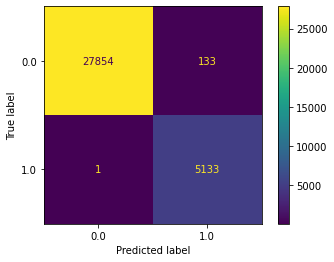

In [91]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=mlp_model.classes_)
disp.plot()
plt.show()

# Выводы



* Наилучшие результаты показала однослойная нейронная сеть с числом нейронов в скрытом слое = 14 и параметром регуляризации alpha примерно равным 0.00015 

Ошибка на тесте = 0.27%, accuracy  равна 99.7%.
* Перебор параметров производился в небольшом диапазоне, при увеличение диапазона ошибку можно уменьшить.Однако и сейчас достигнуты очень хорошие результаты, что является следствием достаточно большой выборки.
* Переобучение не наблюдалось. Недообучение наблюдалось только при небольшом числе нейронов на скрытых слоях или при alpha > $10^{-1}$.
* Использование нейронных сетей позволило значитильно снизить ошибку на тестовой выборке (по сравнению с другими классификаторами).

